In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.

App: Name of the app
Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
Rating: The current average rating (out of 5) of the app on Google Play
Reviews: Number of user reviews given on the app
Size: Size of the app in MB (megabytes)
Installs: Number of times the app was downloaded from Google Play
Type: Whether the app is paid or free
Price: Price of the app in US$
Last Updated: Date on which the app was last updated on Google Play

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data pre-processing

<AxesSubplot:>

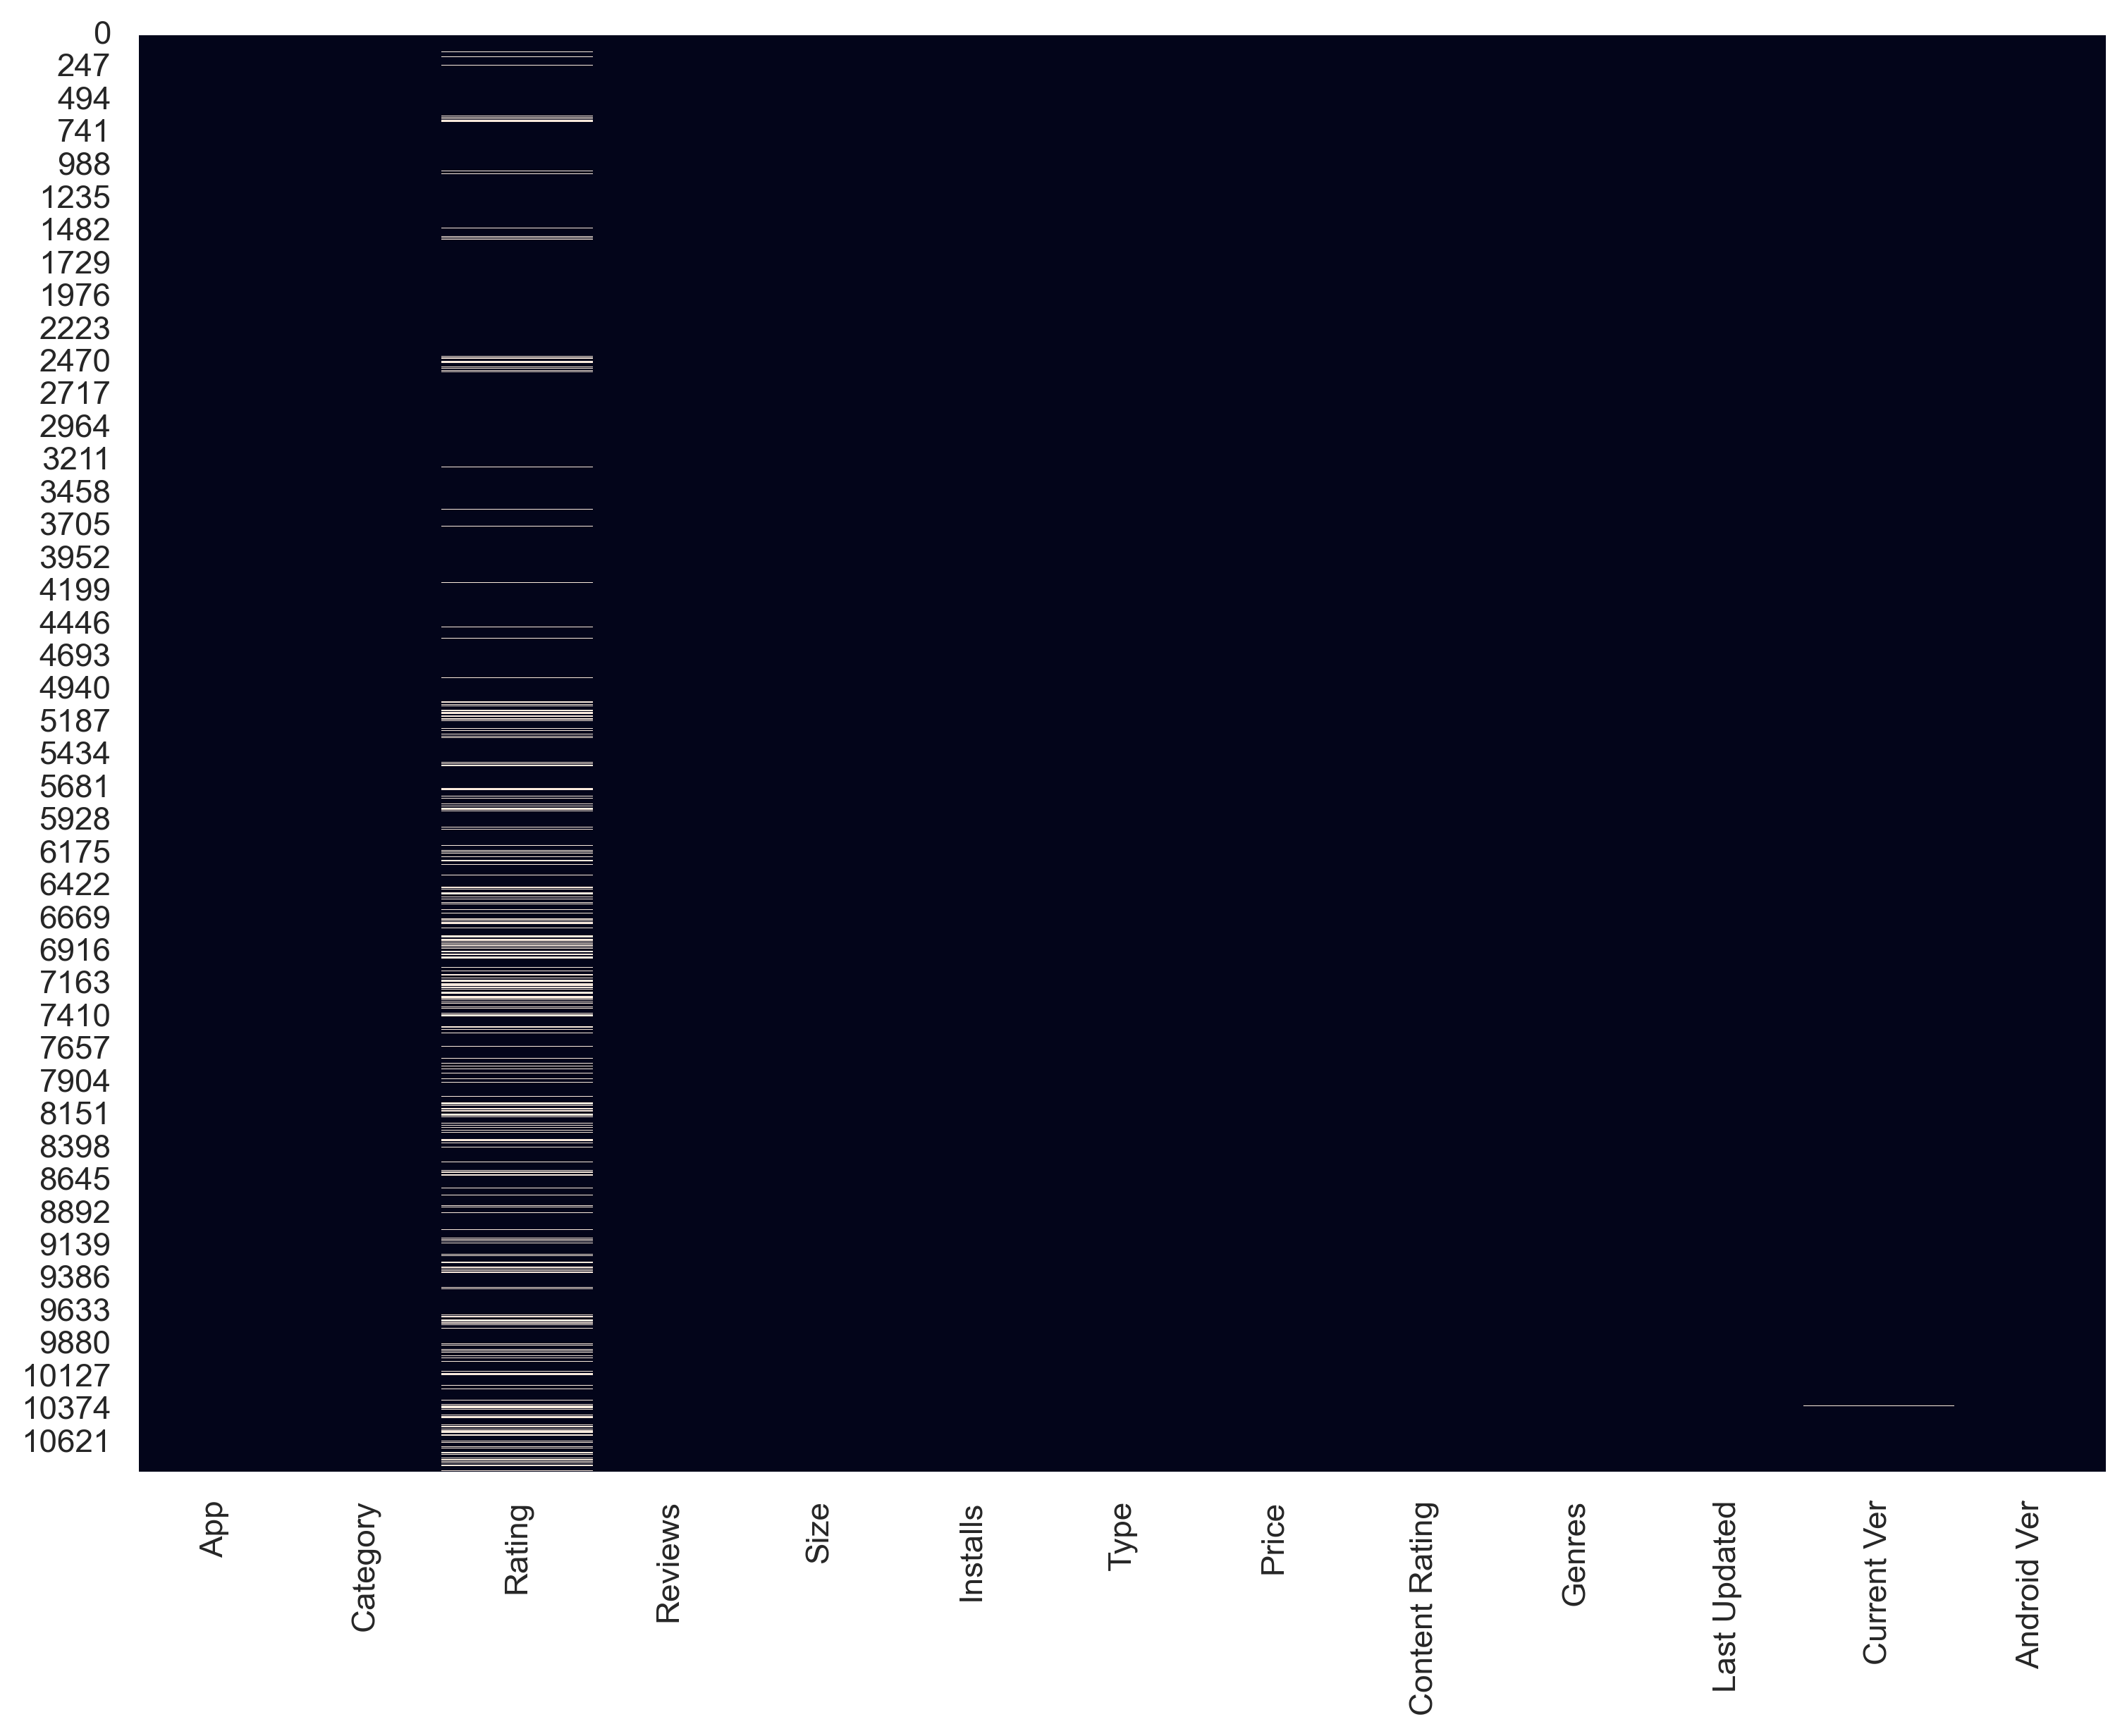

In [7]:
#Heat map to show the columns containg null values

sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})
sns.heatmap(df.isnull(), cbar=False)

In [8]:
rating_mean = df["Rating"].mean()
print(rating_mean)
df["Rating"].fillna(rating_mean, inplace=True)

4.193338315362448


In [9]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [11]:
df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = df['Size'].str.replace('k', '')
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [12]:
import numpy as np

size_mean = df[df["Size"]!="Varies with device"]["Size"].astype(float).mean()
df["Size"].replace("Varies with device", size_mean, inplace=True)
df.Size = pd.to_numeric(df.Size)
df.Size.head()
df.Size.describe().round()

count    10829.0
mean        37.0
std         91.0
min          1.0
25%          7.0
50%         20.0
75%         37.0
max       1020.0
Name: Size, dtype: float64

In [13]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning)
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [15]:
df['Price'] = df['Price'].str.replace('$', '')
warnings.filterwarnings("ignore", category=FutureWarning)
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [16]:
df["Reviews"].describe()


count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [17]:
df["Reviews"] = df["Reviews"].astype("int64")
df["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [18]:
len(df["Genres"].unique())

119

In [19]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [20]:
len(df["Genres"].unique())

48

In [21]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [22]:
df["Genres"].value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [23]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

In [24]:
df["Genres"].value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [25]:
df["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [26]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [27]:
df["Last Updated"].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


Data Visualization

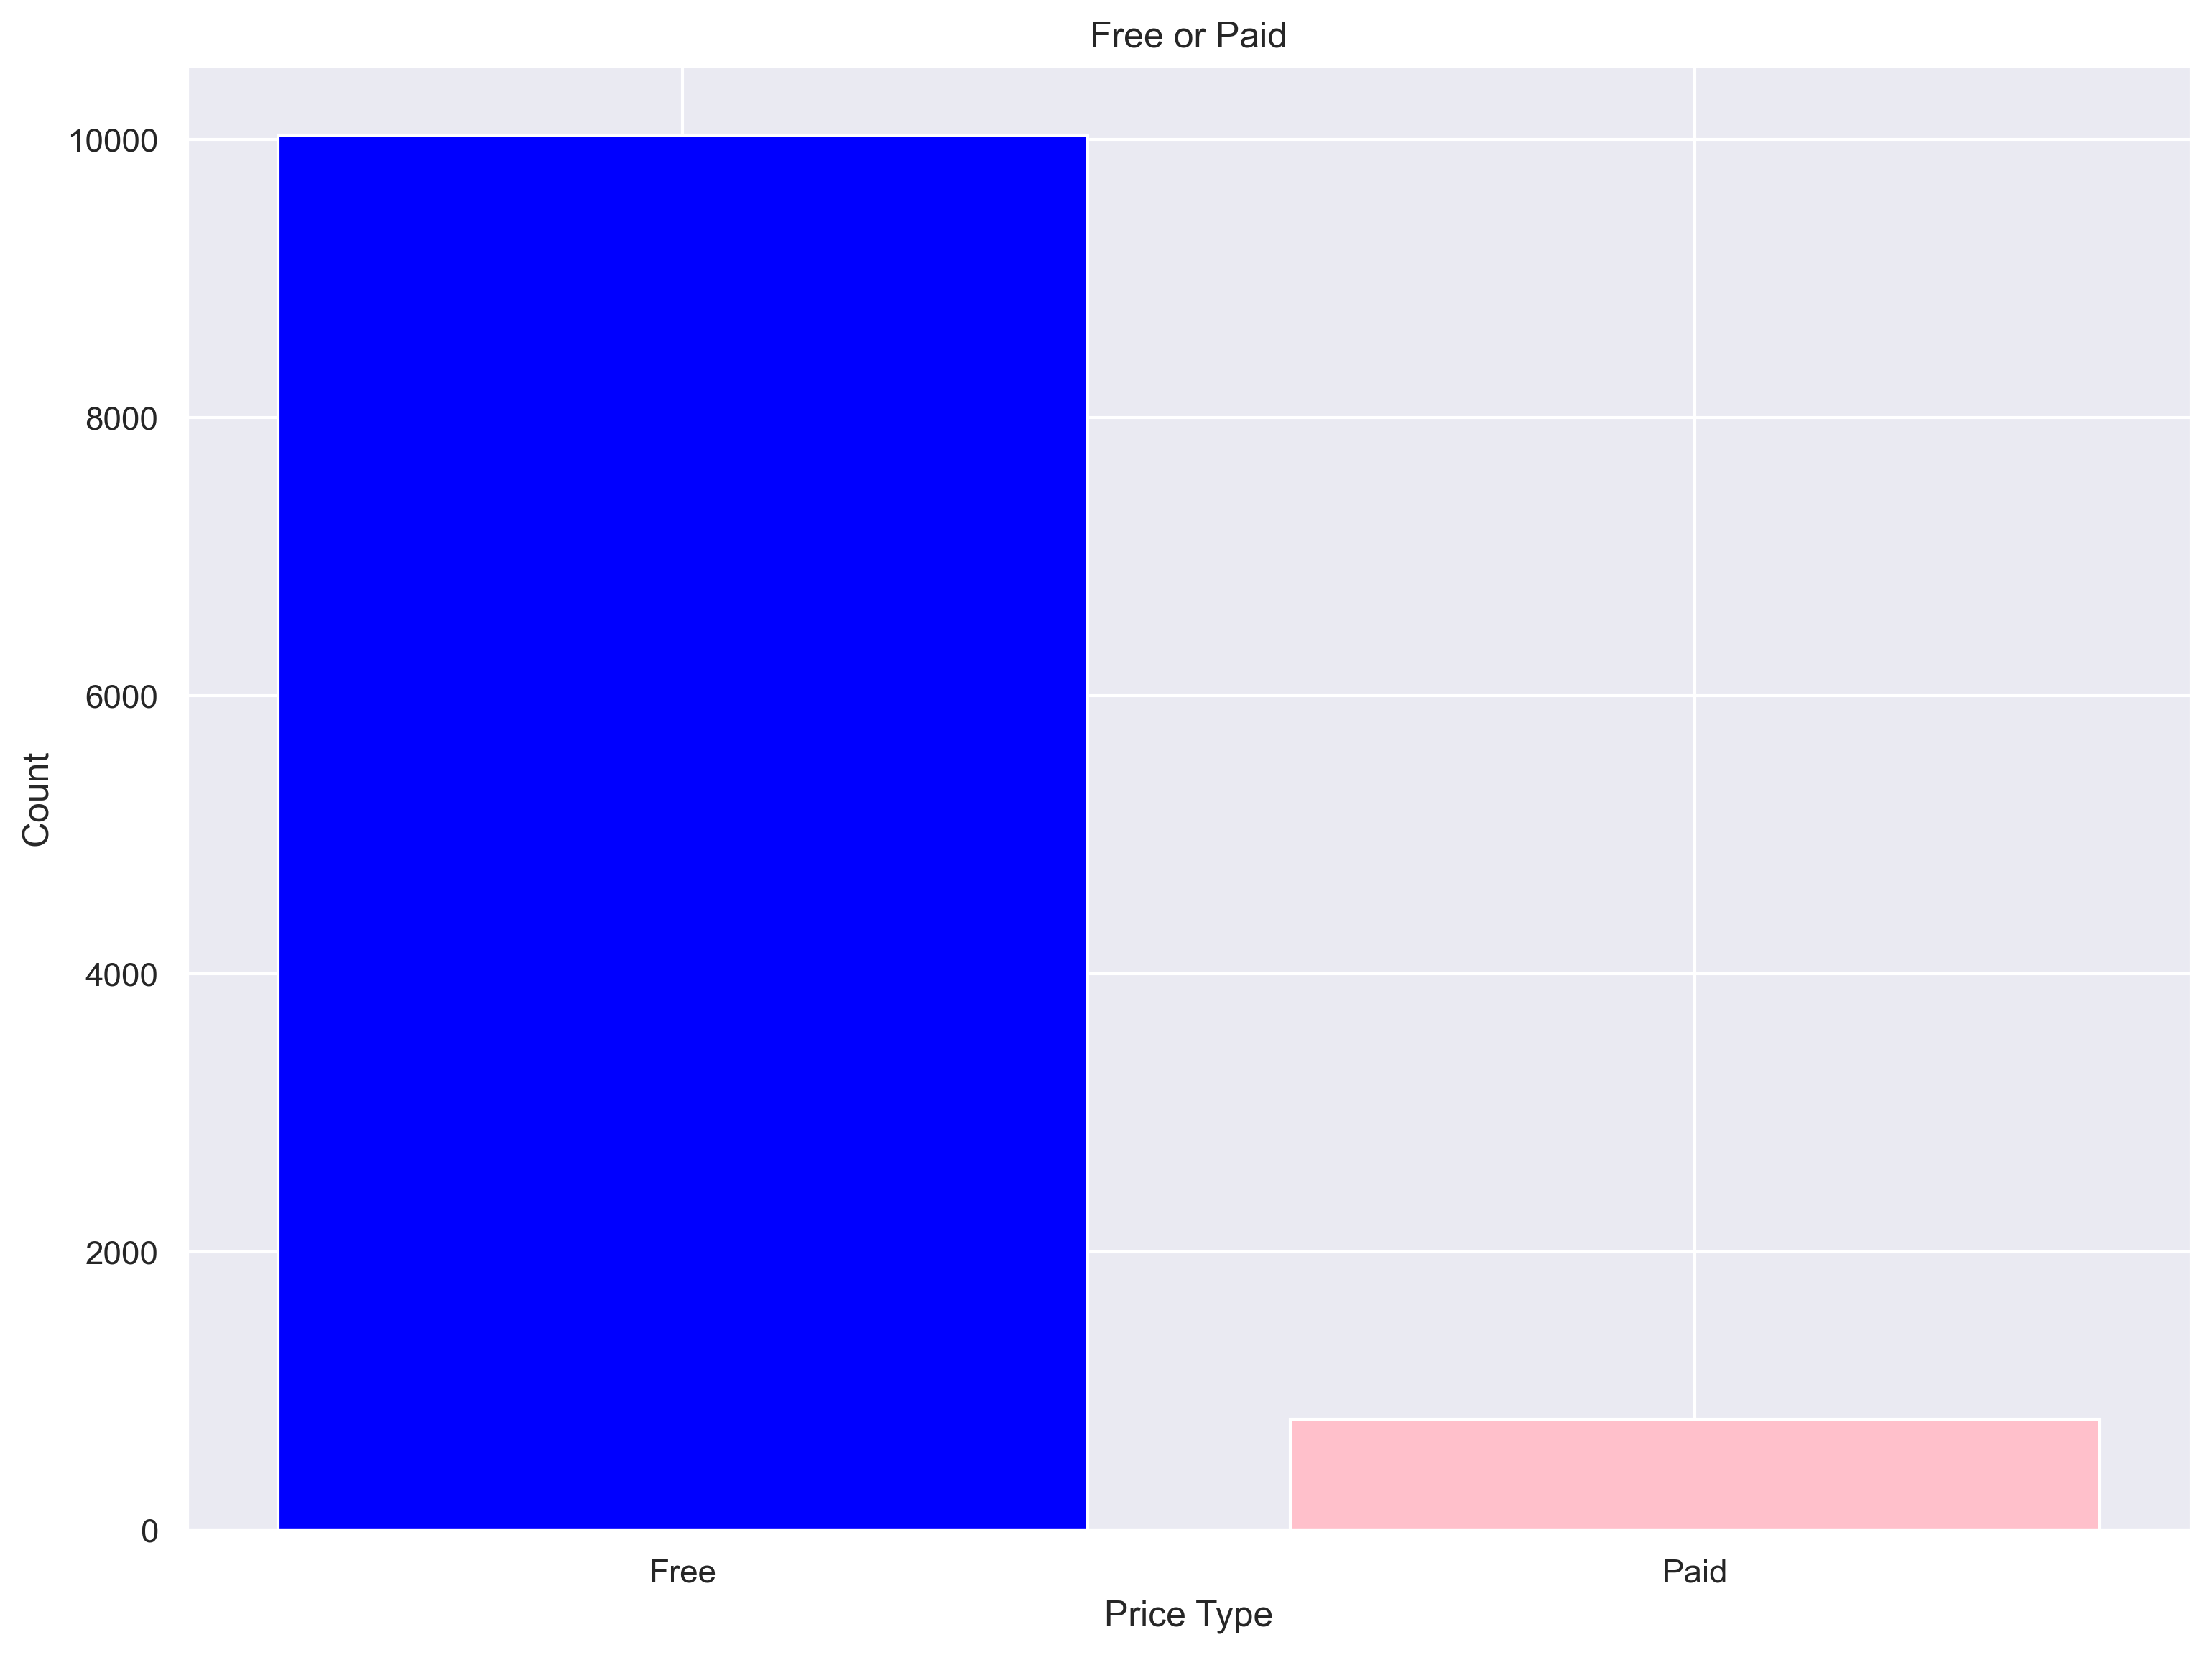

In [29]:
#Bar graph showing the no. of paid and free apps

type_counts = df['Type']
type_counts = type_counts.value_counts()
plt.bar(type_counts.index, type_counts.values,color=['blue','pink'])

# Add labels and title
plt.xlabel('Price Type')
plt.ylabel('Count')
plt.title('Free or Paid')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Content rating with their counts')

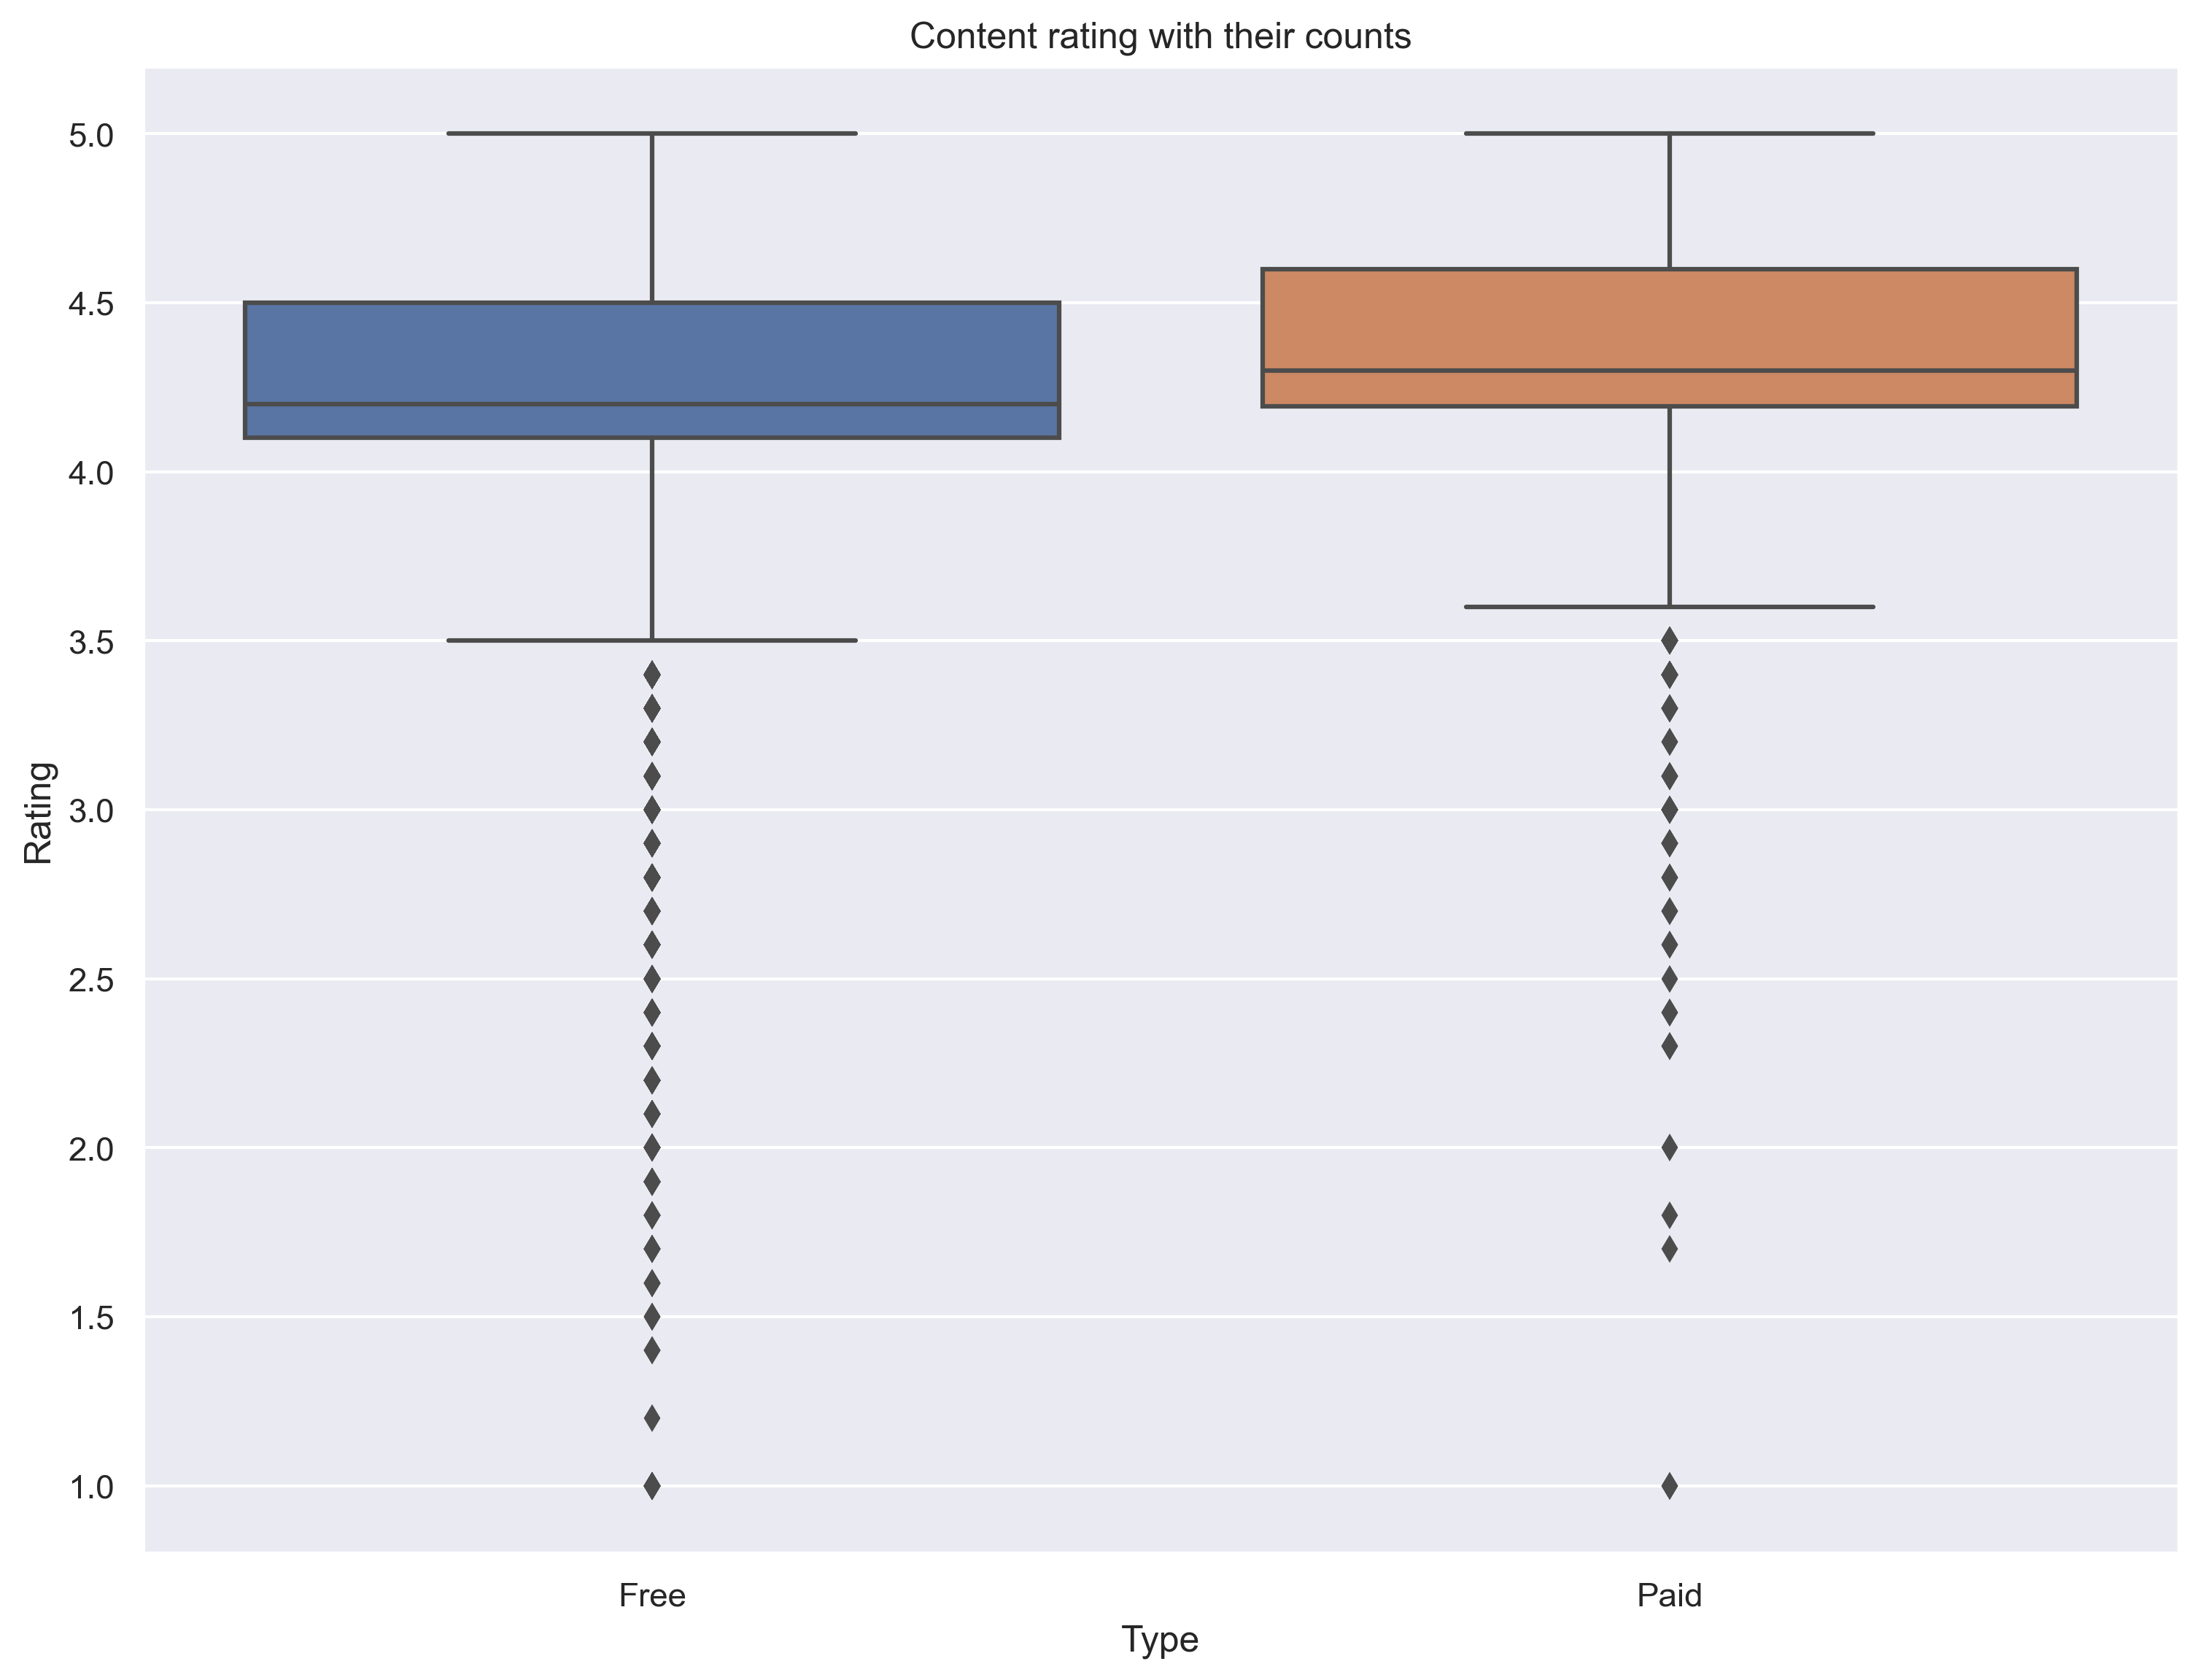

In [30]:
#Box plot for rating column

sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")

Text(0.5, 1.0, 'The content rating & rating')

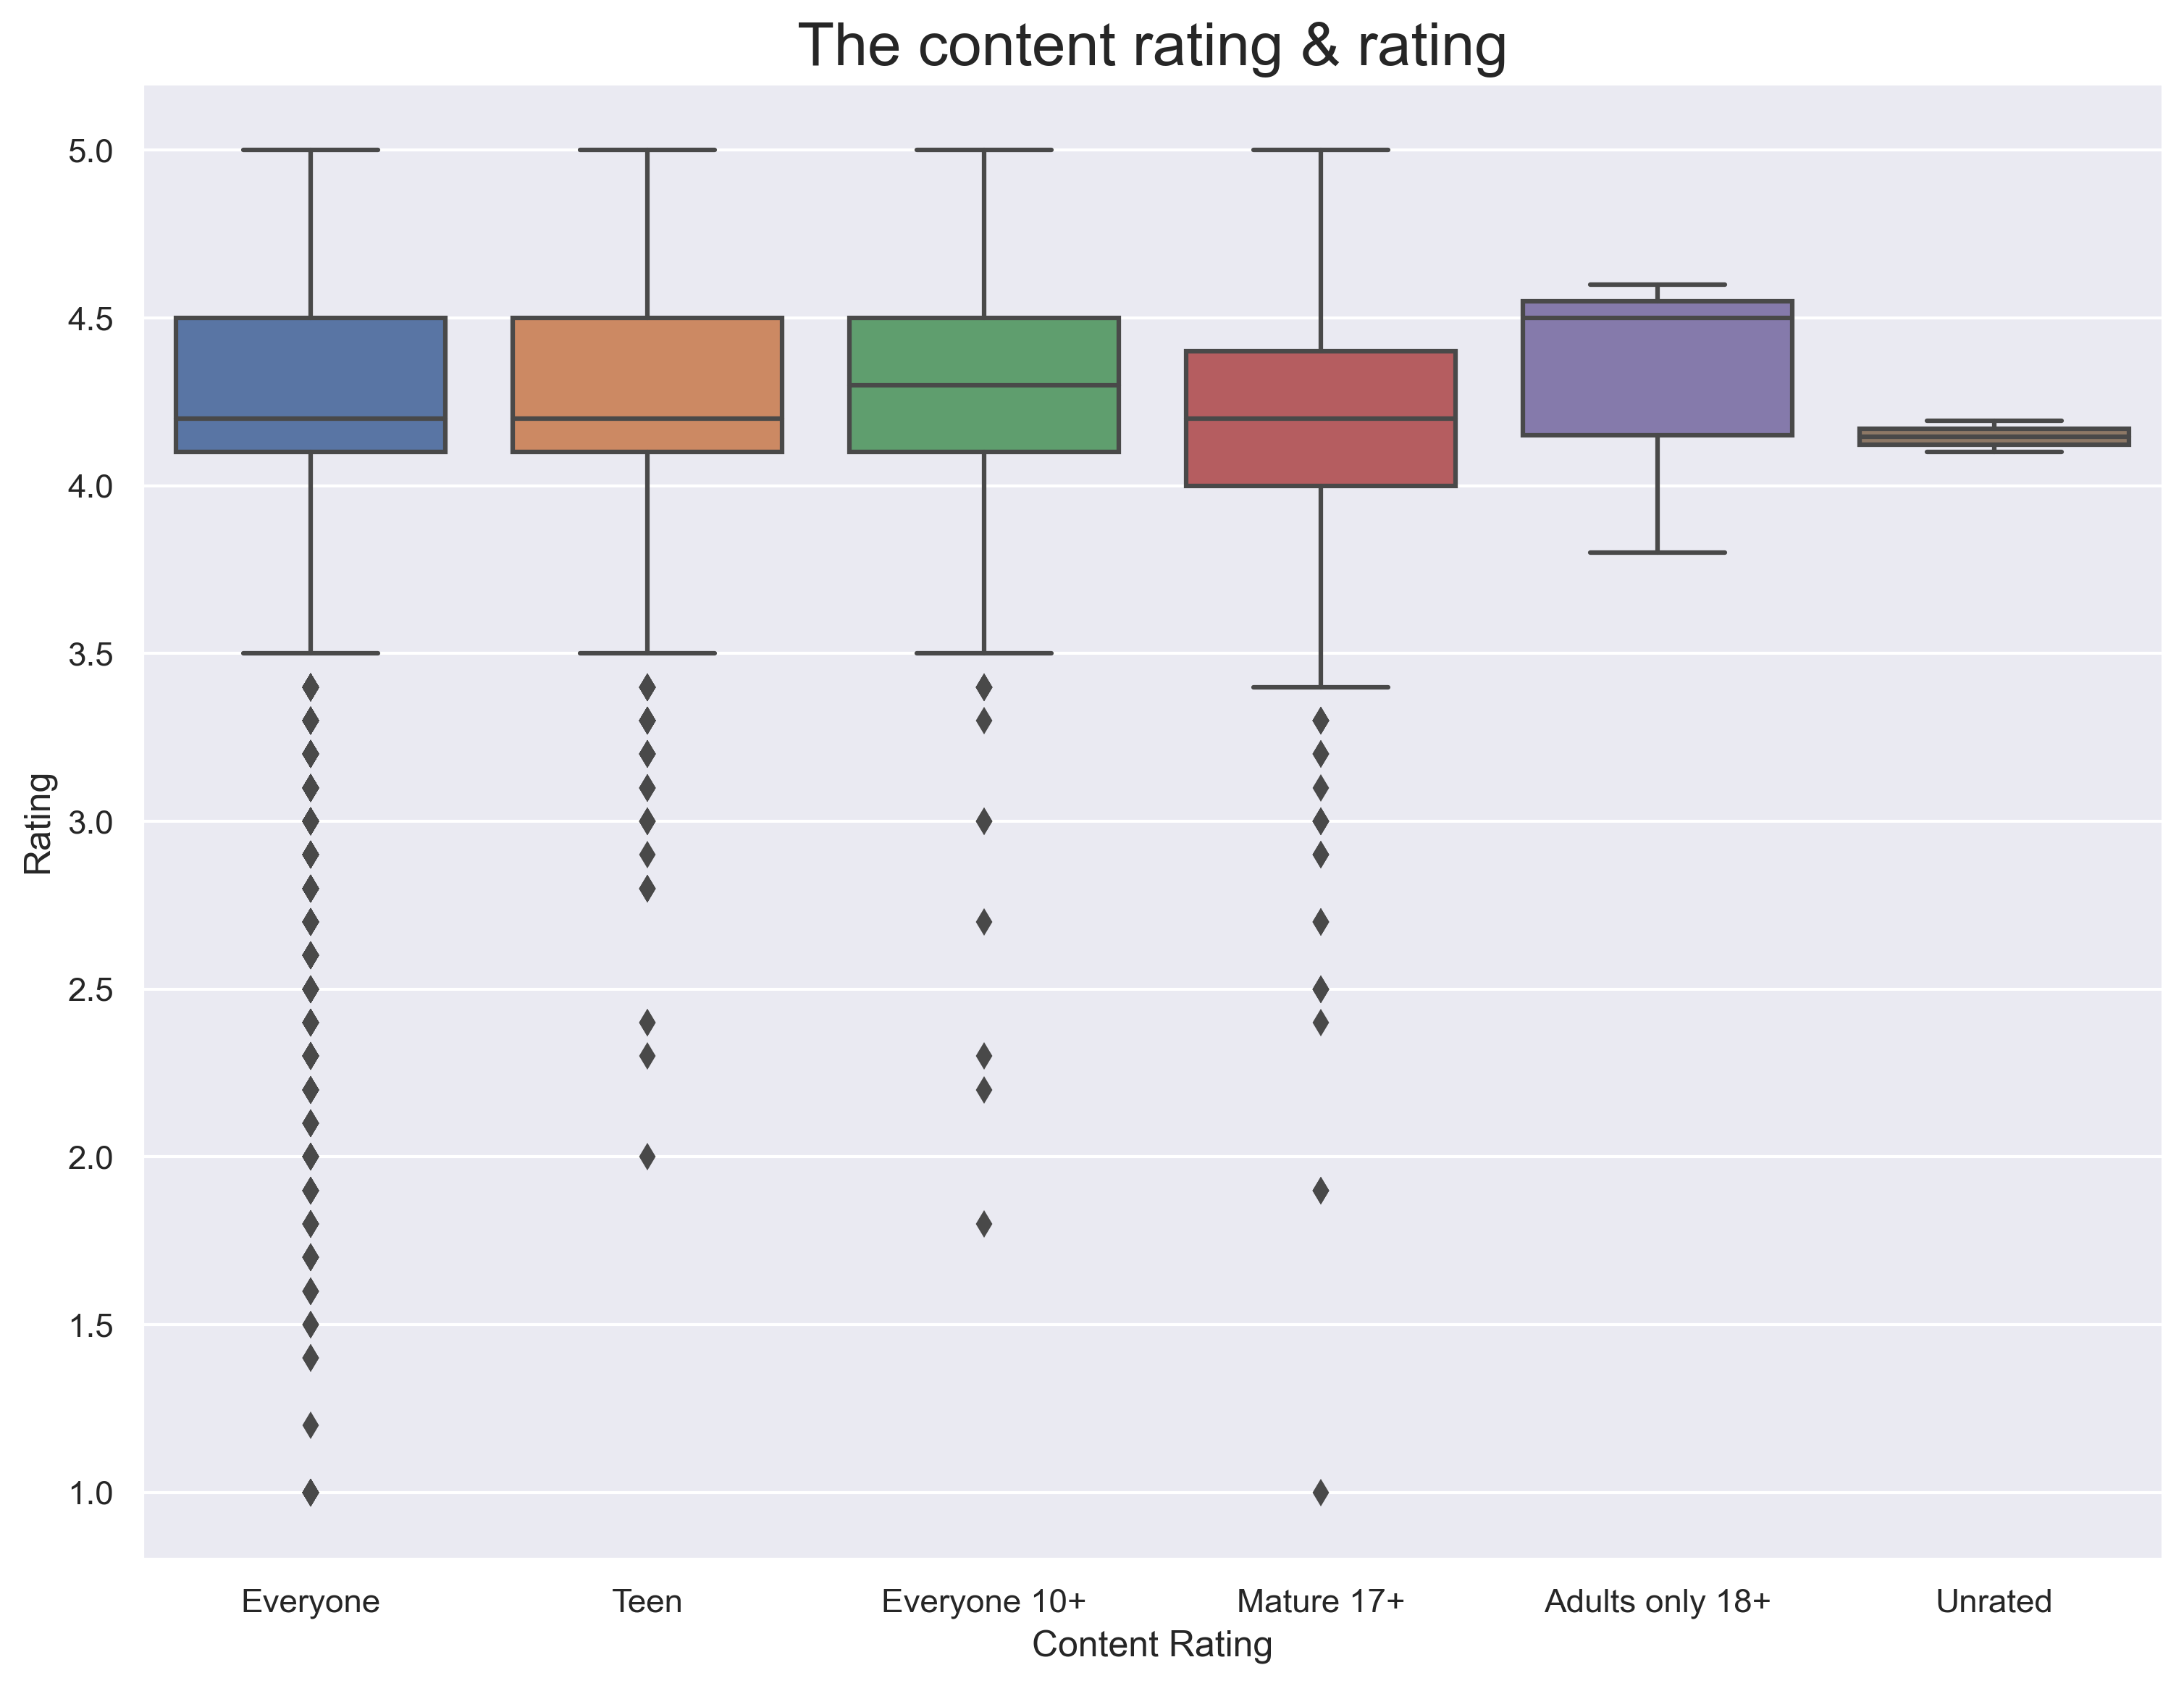

In [31]:
#Scatter plot for content rating and rating

sns.boxplot(x = "Content Rating", y = "Rating", data = df)
plt.title("The content rating & rating", size=20)

Text(0.5, 1.0, 'The number of categories')

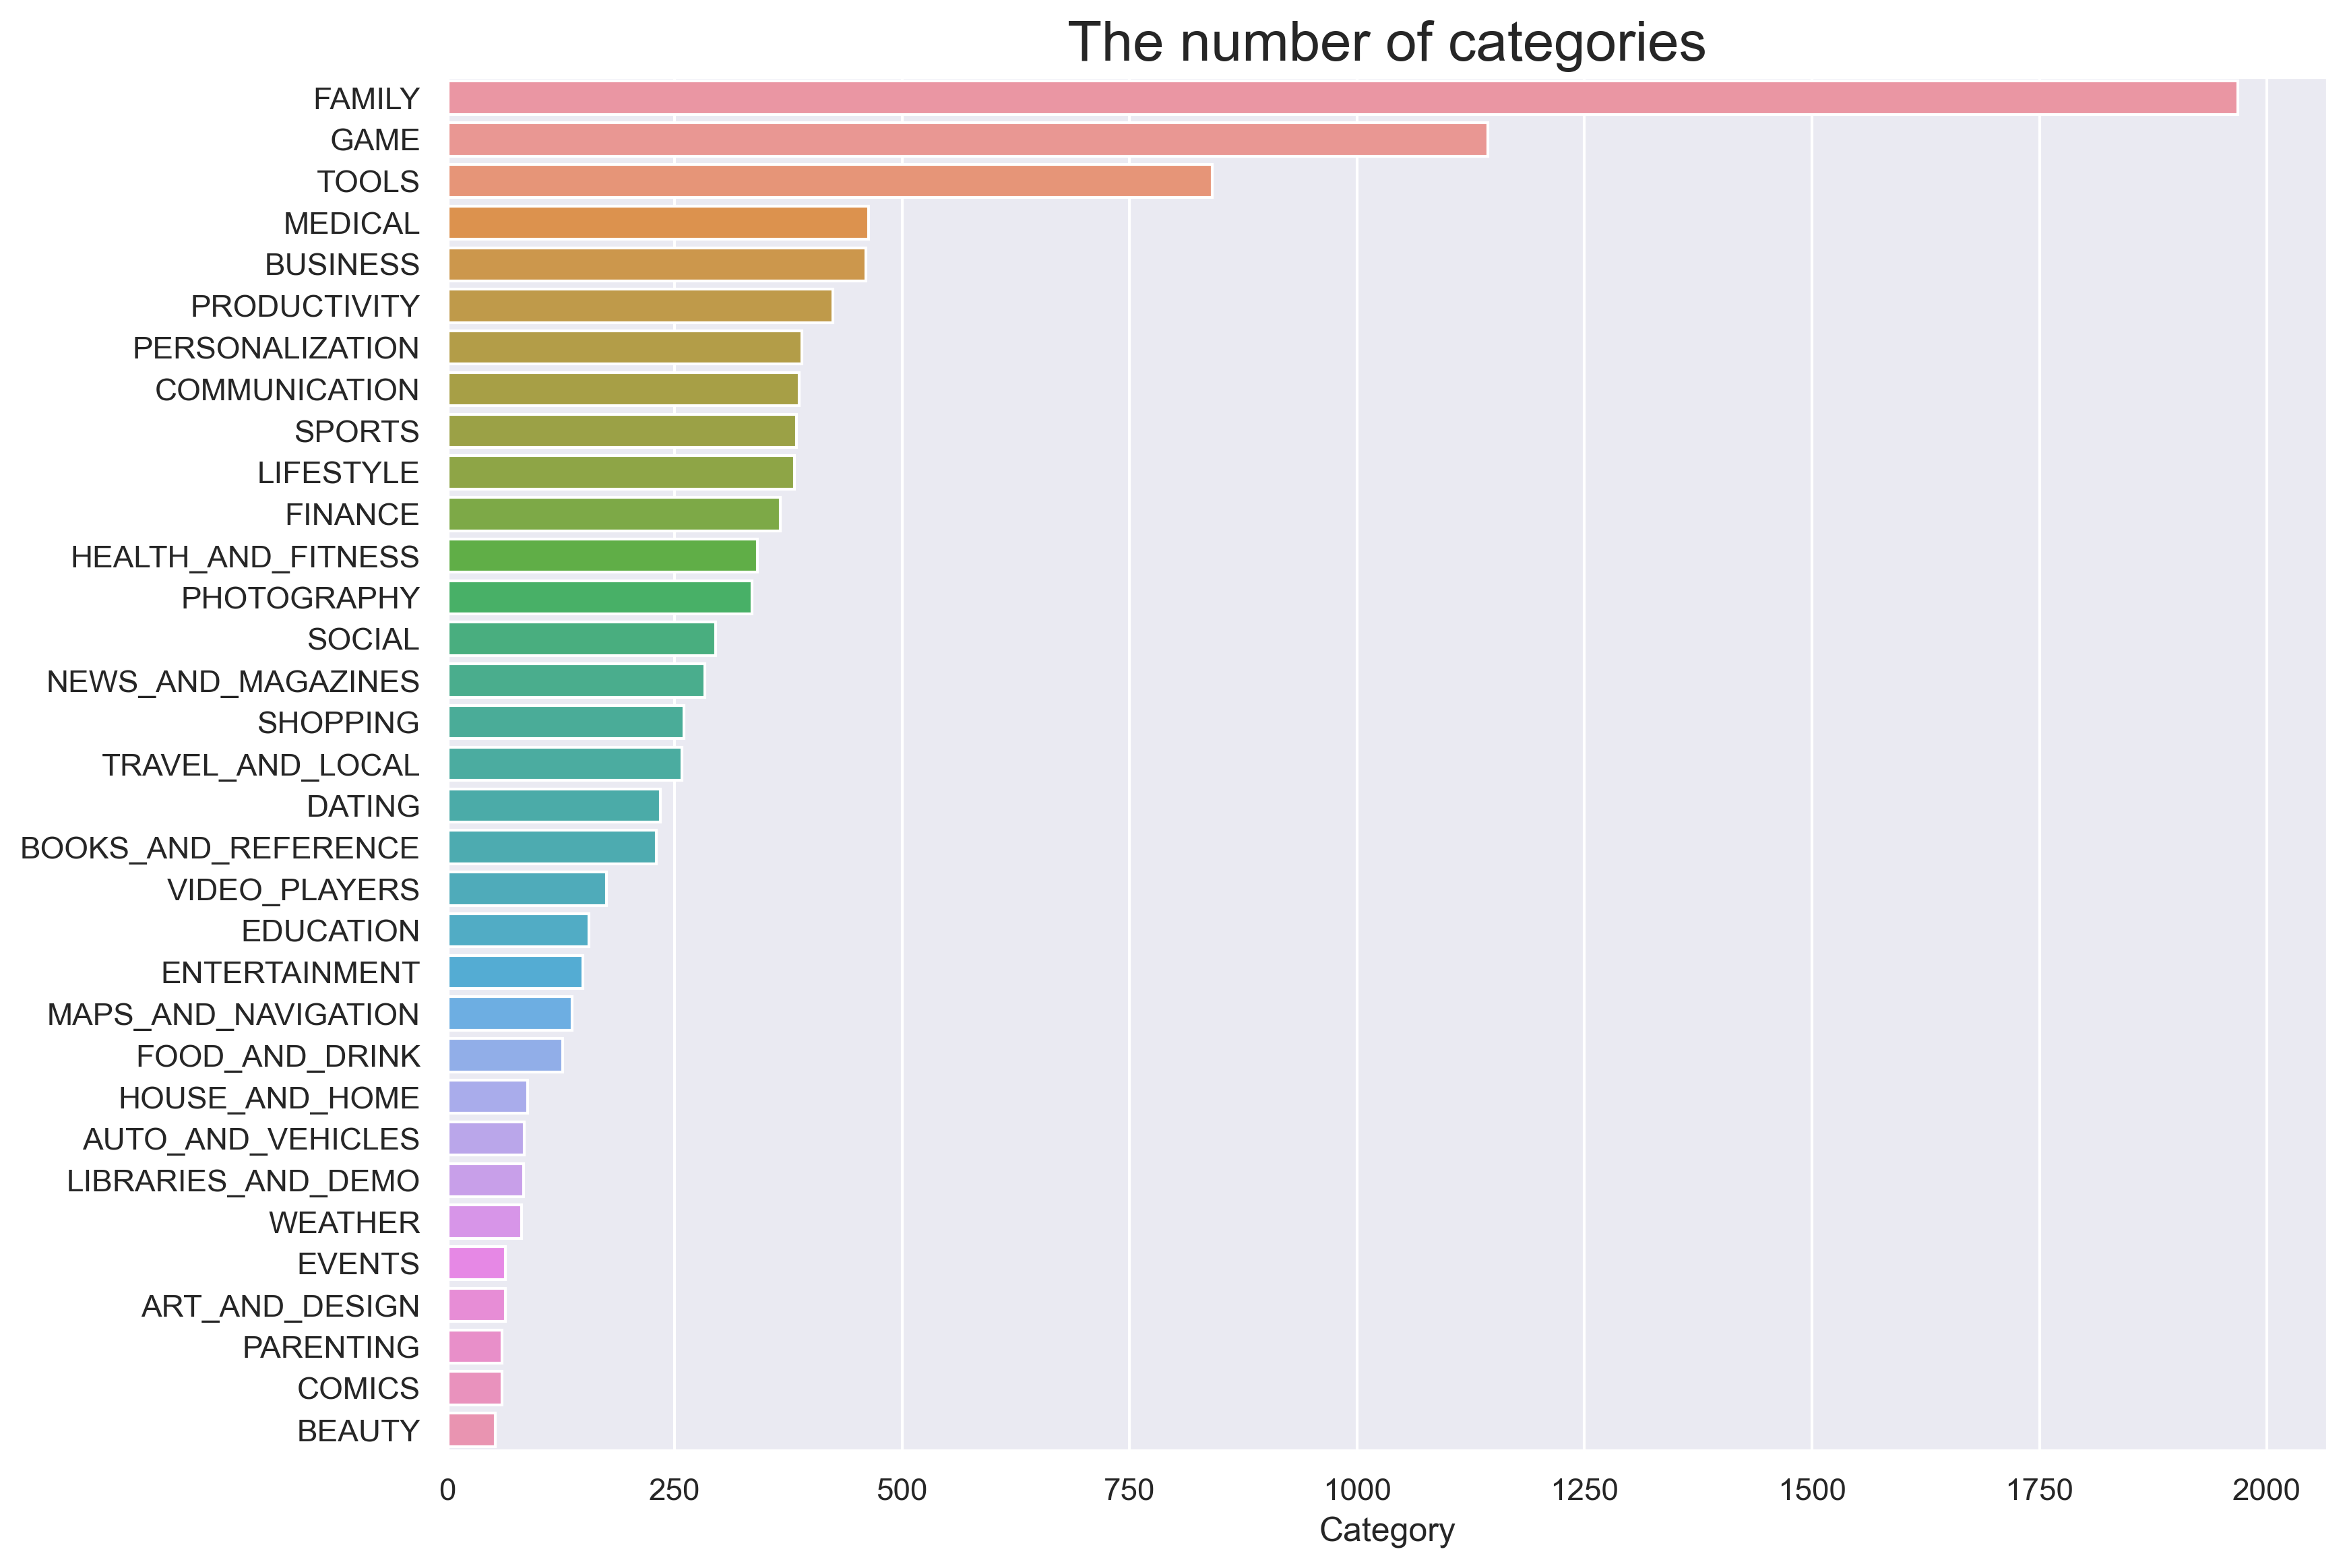

In [42]:
#Bar graph showing the frequency of apps in diffrent categories

cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title("Frequency of apps in different categories", size=20)

([<matplotlib.axis.XTick at 0x23b05b28d30>,
 [Text(0, 0, ''), Text(0, 0, '')])

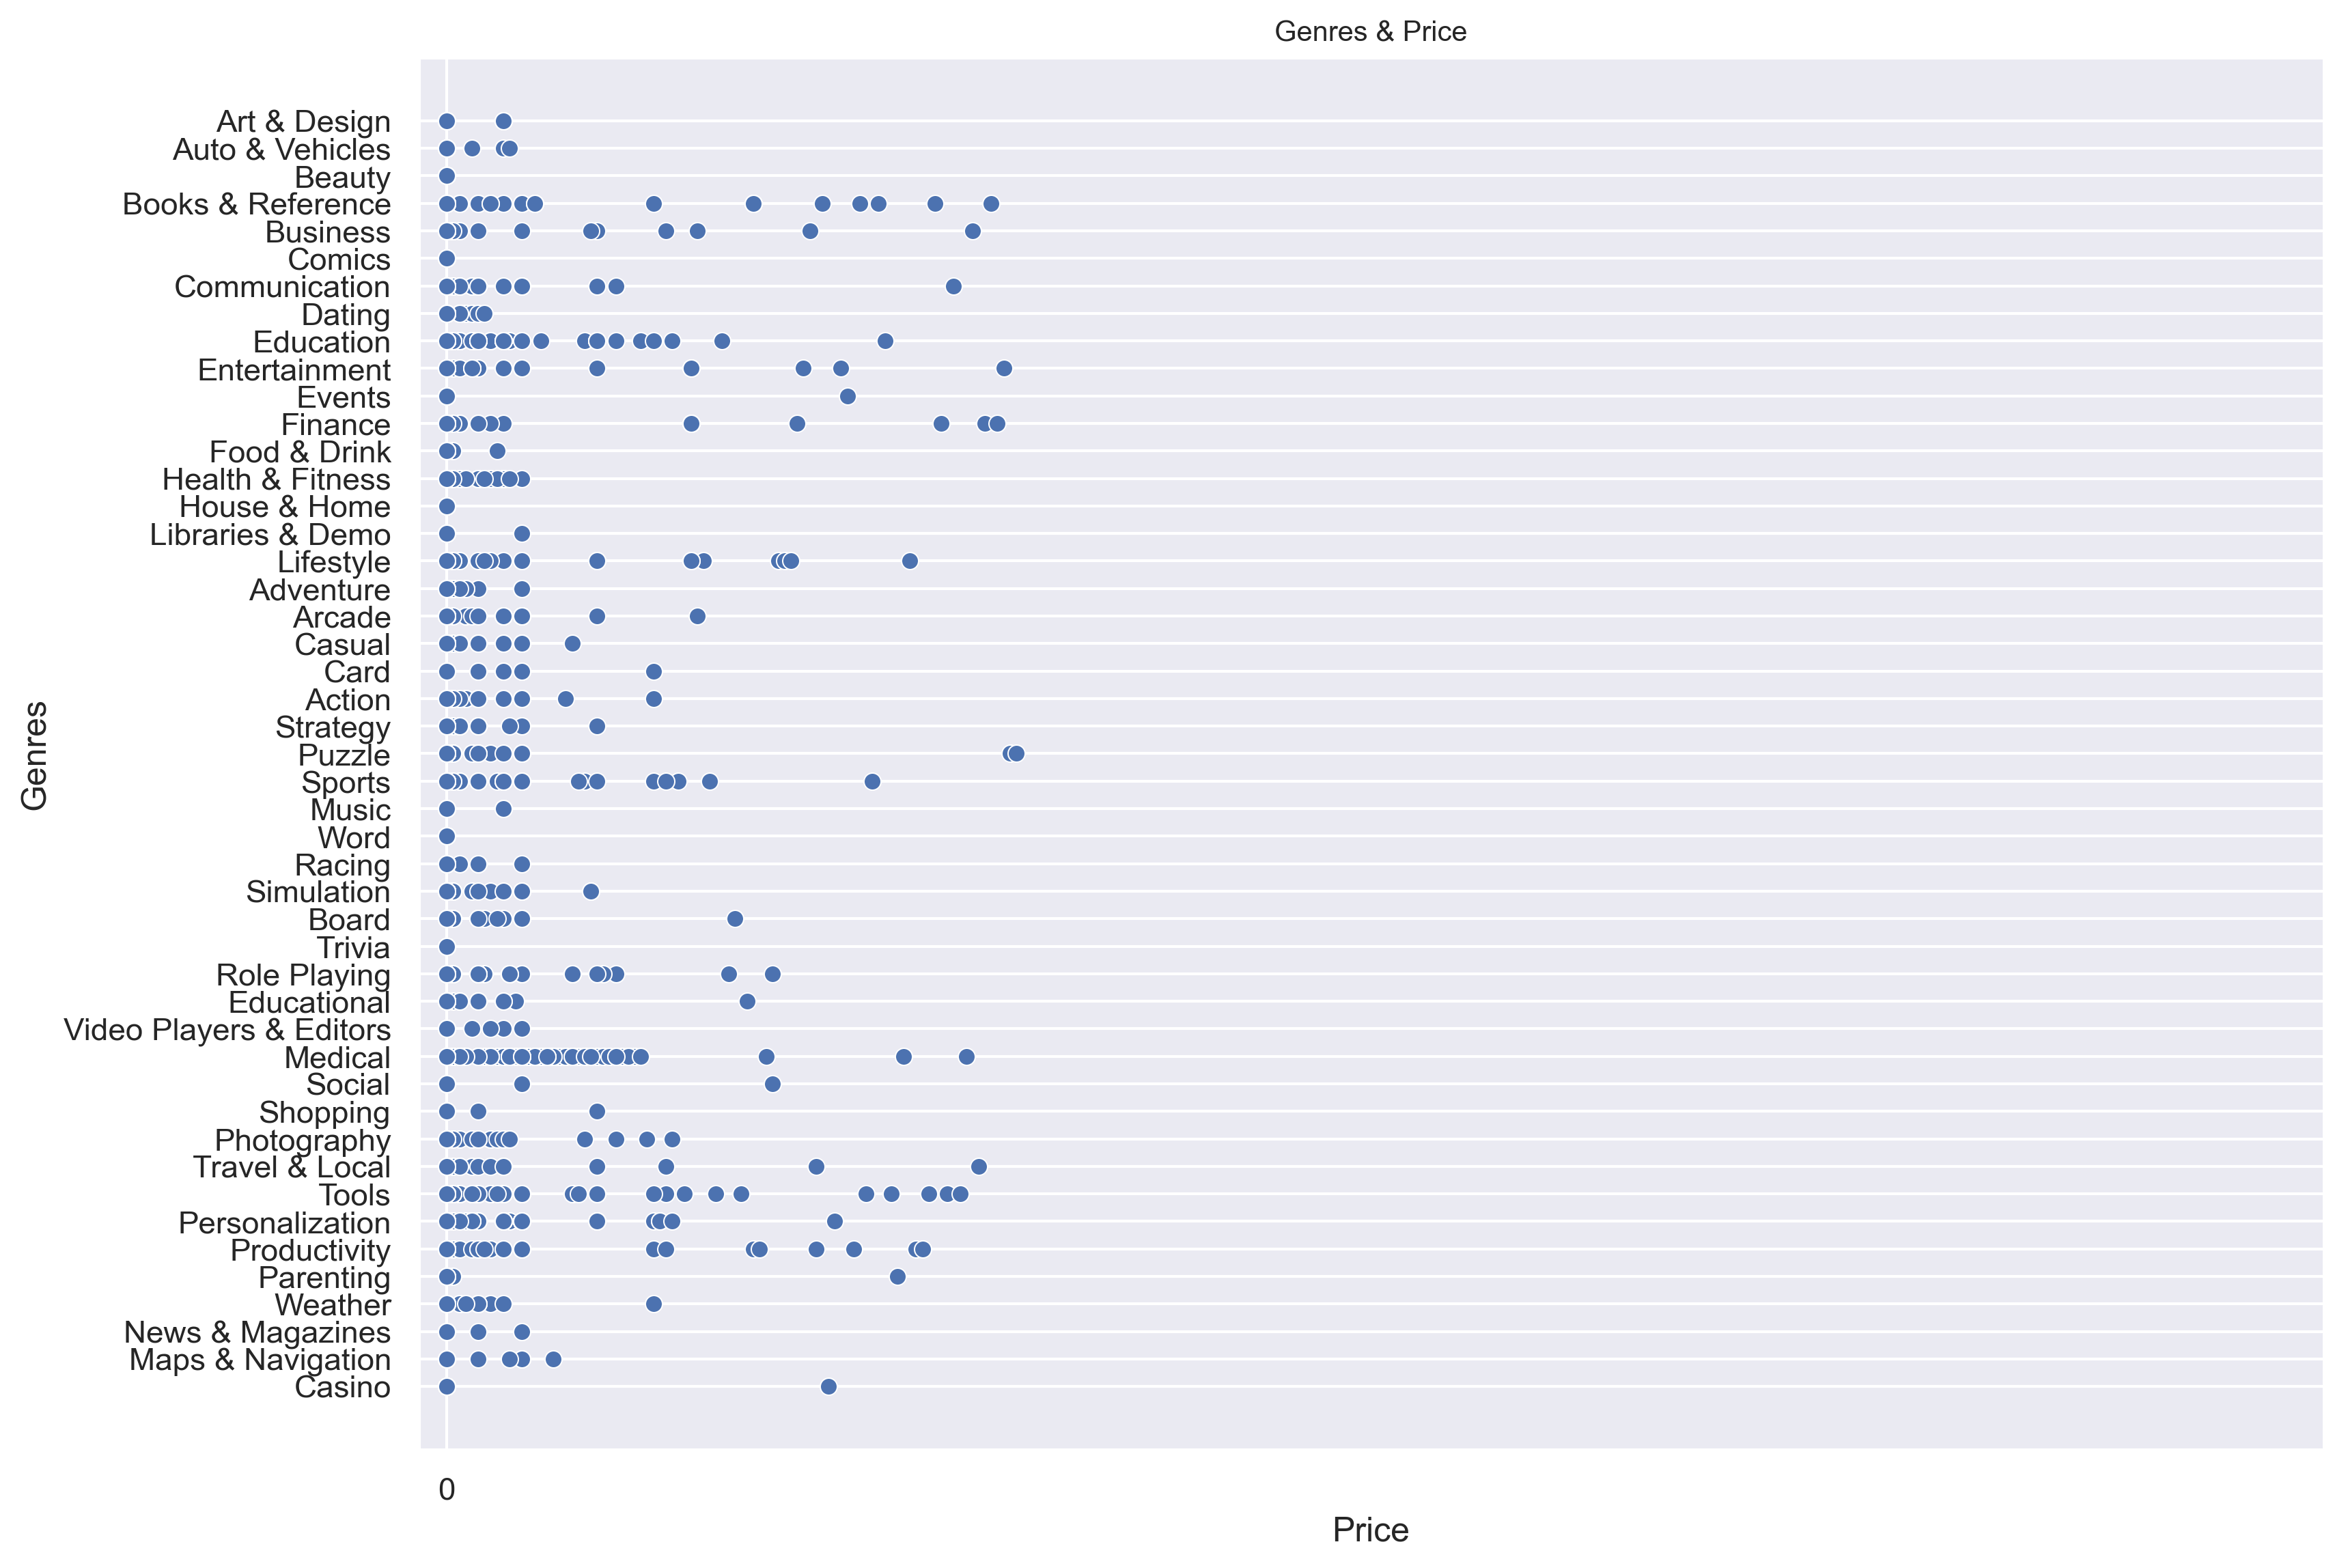

In [51]:
#Scatter plot showing the variation of genres and prices for apps in the same

sns.scatterplot(data = df, y = "Genres", x = "Price")
plt.title("Genres & Price", size=10)
x_ticks = [0,300]  # Selected x-axis values to show

# Set the tick labels on the x-axis
plt.xticks(x_ticks)

Text(0.5, 1.0, 'Heatmap for numerical columns')

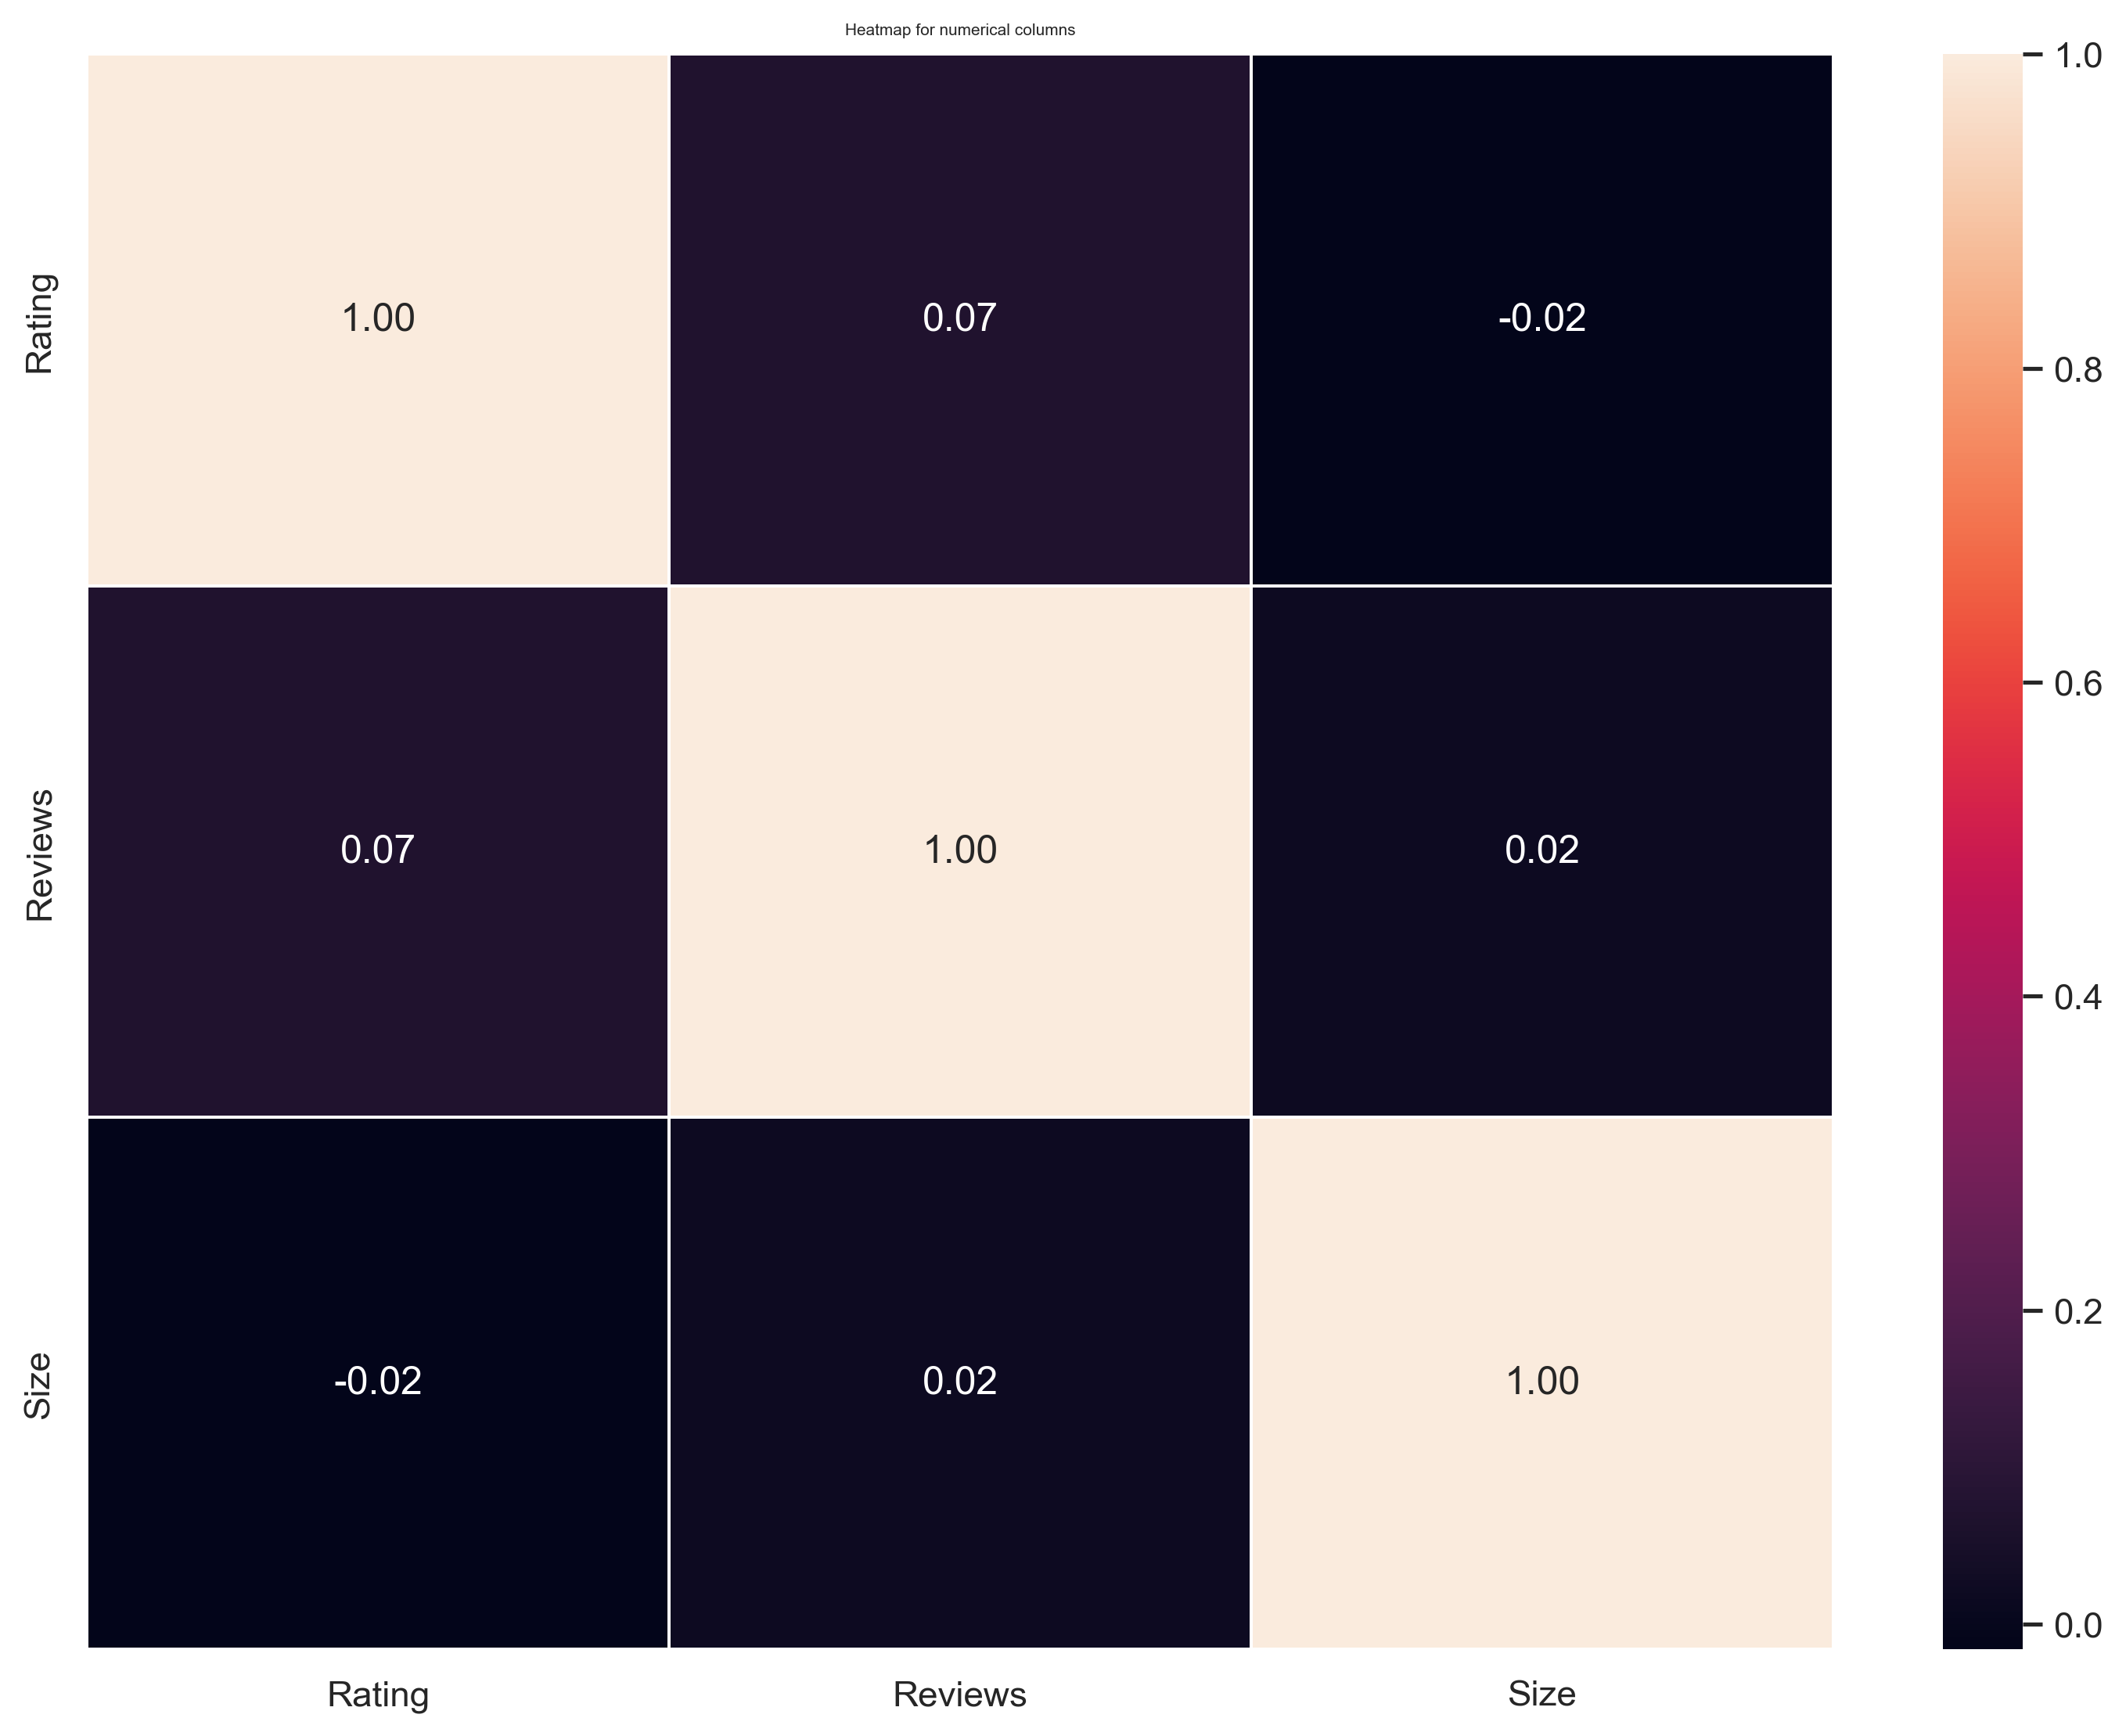

In [50]:
#Heatmap for numerical values

sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=5)